Access [kroki](https://kroki.io/) from python. 

To install:	```pip install kroki```

The `kroki` python package is a convenience package for you to be able to generate diagrams, 
through [kroki](https://kroki.io/), getting your images as bytes or as ipython objects via python 
functions or doing some "cell magic" in your jupyter notebooks.

I suggest you have a look at the [kroki's excellent homepage](https://kroki.io/) 
where you'll be able to try different diagram types out. 
Don't miss the nice [cheatsheet](https://kroki.io/assets/kroki_cheatsheet_20210515_v1.1_EN.pdf) there.


# Overview

You can get the bytes of an image of a diagram like so:

In [1]:
from kroki import diagram_image_bytes

svn_bytes = diagram_image_bytes('Bob->Alice : Hello!')
# which you can then save in a file...

When in a jupyter notebook though, you have a more convenient function that will put those bytes into an IPython display object, which you can then display (will automatically call display if it's the last command of the cell), amongst other things.

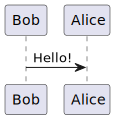

In [2]:
from kroki import diagram_image

diagram_image('Bob->Alice : Hello!')

In both those functions, the default is `diagram_type='plantuml'` and `output_format='svg'`.

But you have other choices.

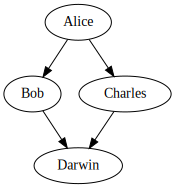

In [3]:
diagram_image('digraph D {Alice -> Bob, Charles -> Darwin}', diagram_type='graphviz')

In [4]:
png_bytes = diagram_image_bytes('Bob->Alice : Hello!', output_format='png')
png_bytes[:7]

b'\x89PNG\r\n\x1a'

And then, there's magic, which will allow you to write your diagram source directly in a notebook's cell.

In [5]:
%load_ext kroki

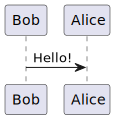

In [6]:
%%kroki

Bob->Alice : Hello!

The default `diagram_type` is still `plantuml`, but you can specify another type if you want.

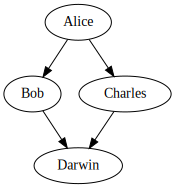

In [7]:
%%kroki graphviz

digraph D {
    Alice -> Bob, Charles -> Darwin
}

To see what diagram types `kroki` supports through the `diagram_types` variable.

In [8]:
from kroki import diagram_types

print(diagram_types)

{'packetdiag', 'plantuml', 'actdiag', 'rackdiag', 'vegalite', 'blockdiag', 'wavedrom', 'bpmn', 'erd', 'nomnoml', 'c4plantuml', 'excalidraw', 'ditaa', 'bytefield', 'umlet', 'mermaid', 'svgbob', 'seqdiag', 'nwdiag', 'graphviz', 'pikchr', 'vega', 'structurizr'}


Not all `output_format` values are supported for all diagram types. To which are supported for which types, you can have a look at the `output_formats` dictionary, which which contains both the choices of diagram_type (as keys) and the corresponding output_format each support (as values).

In [9]:
from kroki import output_formats

output_formats['plantuml']

['png', 'svg', 'jpeg', 'base64']

In [10]:
output_formats['mermaid']

['svg']

In [11]:
output_formats['seqdiag']

['png', 'svg', 'pdf']

# Trying out different diagram types

In [7]:
# need to do this to get the kroki magic!
import kroki
%load_ext kroki

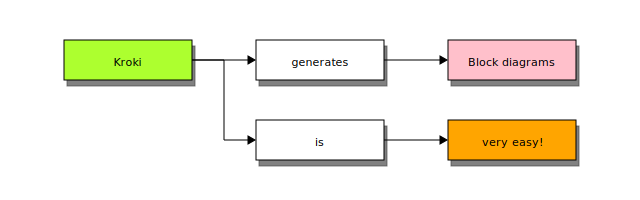

In [8]:
%%kroki blockdiag

blockdiag {
  Kroki -> generates -> "Block diagrams";
  Kroki -> is -> "very easy!";

  Kroki [color = "greenyellow"];
  "Block diagrams" [color = "pink"];
  "very easy!" [color = "orange"];
}

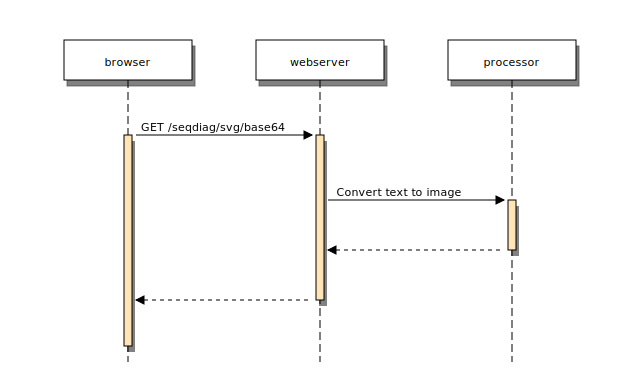

In [12]:
%%kroki seqdiag

seqdiag {
  browser  -> webserver [label = "GET /seqdiag/svg/base64"];
  webserver  -> processor [label = "Convert text to image"];
  webserver <-- processor;
  browser <-- webserver;
}

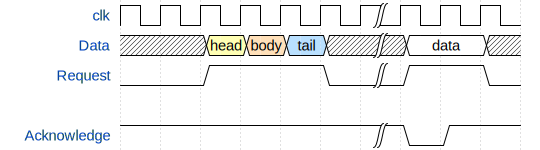

In [34]:
%%kroki wavedrom

{ signal: [
  { name: "clk",         wave: "p.....|..." },
  { name: "Data",        wave: "x.345x|=.x", data: ["head", "body", "tail", "data"] },
  { name: "Request",     wave: "0.1..0|1.0" },
  {},
  { name: "Acknowledge", wave: "1.....|01." }
]}

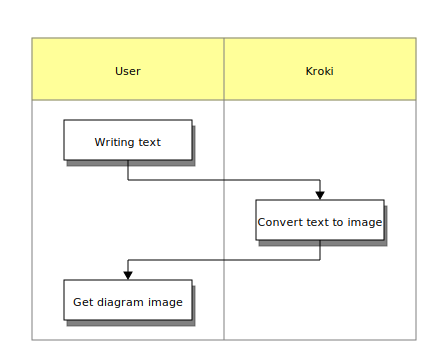

In [13]:
%%kroki actdiag

actdiag {
  write -> convert -> image

  lane user {
    label = "User"
    write [label = "Writing text"];
    image [label = "Get diagram image"];
  }
  lane Kroki {
    convert [label = "Convert text to image"];
  }
}

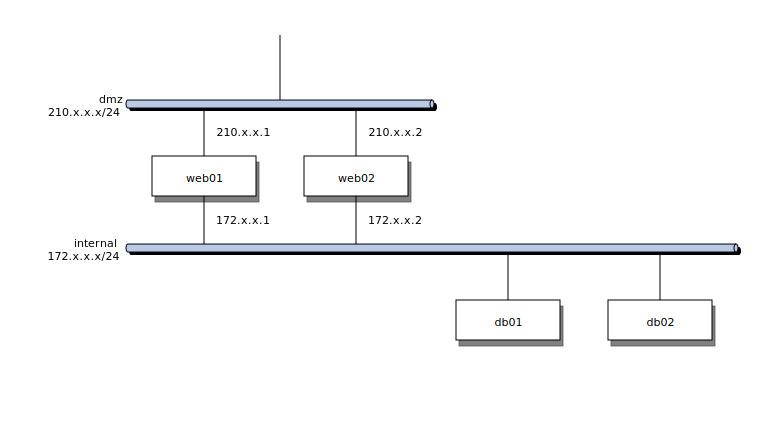

In [14]:
%%kroki nwdiag

nwdiag {
  network dmz {
    address = "210.x.x.x/24"

    web01 [address = "210.x.x.1"];
    web02 [address = "210.x.x.2"];
  }
  network internal {
    address = "172.x.x.x/24";

    web01 [address = "172.x.x.1"];
    web02 [address = "172.x.x.2"];
    db01;
    db02;
  }
}

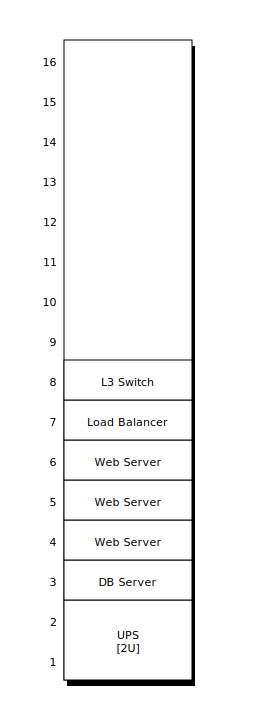

In [16]:
%%kroki rackdiag

rackdiag {
  16U;
  1: UPS [2U];
  3: DB Server;
  4: Web Server;
  5: Web Server;
  6: Web Server;
  7: Load Balancer;
  8: L3 Switch;
}

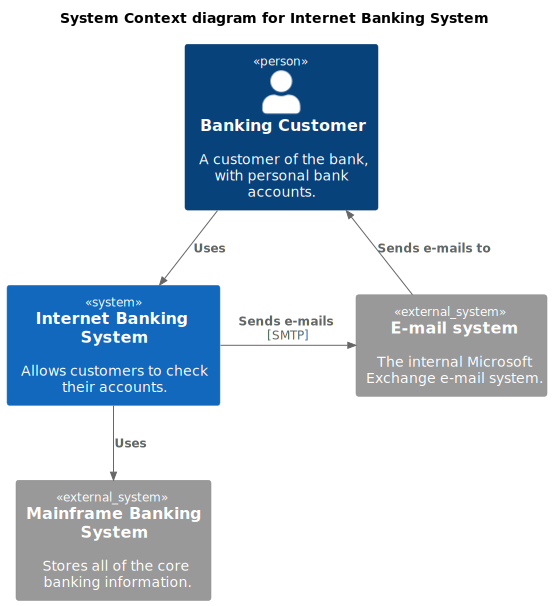

In [17]:
%%kroki c4plantuml

@startuml
!include C4_Context.puml

title System Context diagram for Internet Banking System

Person(customer, "Banking Customer", "A customer of the bank, with personal bank accounts.")
System(banking_system, "Internet Banking System", "Allows customers to check their accounts.")

System_Ext(mail_system, "E-mail system", "The internal Microsoft Exchange e-mail system.")
System_Ext(mainframe, "Mainframe Banking System", "Stores all of the core banking information.")

Rel(customer, banking_system, "Uses")
Rel_Back(customer, mail_system, "Sends e-mails to")
Rel_Neighbor(banking_system, mail_system, "Sends e-mails", "SMTP")
Rel(banking_system, mainframe, "Uses")
@enduml

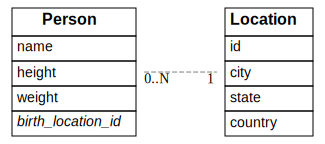

In [19]:
%%kroki erd

[Person]
*name
height
weight
+birth_location_id

[Location]
*id
city
state
country

Person *--1 Location

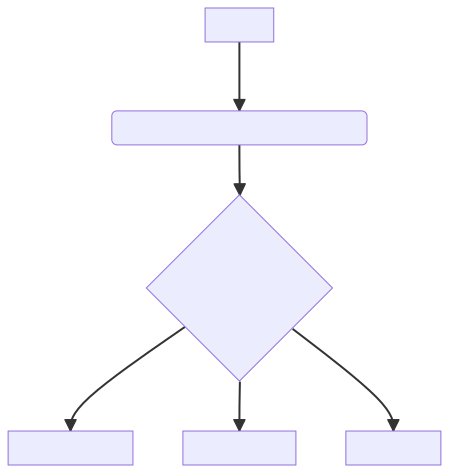

In [22]:
%%kroki mermaid

graph TD
  A[ Anyone ] -->|Can help | B( Go to github.com/yuzutech/kroki )
  B --> C{ How to contribute? }
  C --> D[ Reporting bugs ]
  C --> E[ Sharing ideas ]
  C --> F[ Advocating ]


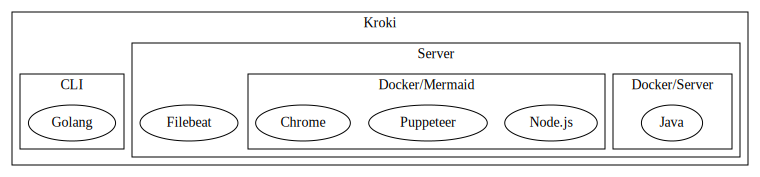

In [21]:
%%kroki graphviz

digraph D {
  subgraph cluster_p {
    label = "Kroki";
    subgraph cluster_c1 {
      label = "Server";
      Filebeat;
      subgraph cluster_gc_1 {
        label = "Docker/Server";
        Java;
      }
      subgraph cluster_gc_2 {
        label = "Docker/Mermaid";
        "Node.js";
        "Puppeteer";
        "Chrome";
      }
    }
    subgraph cluster_c2 {
      label = "CLI";
      Golang;
    }
  }
}

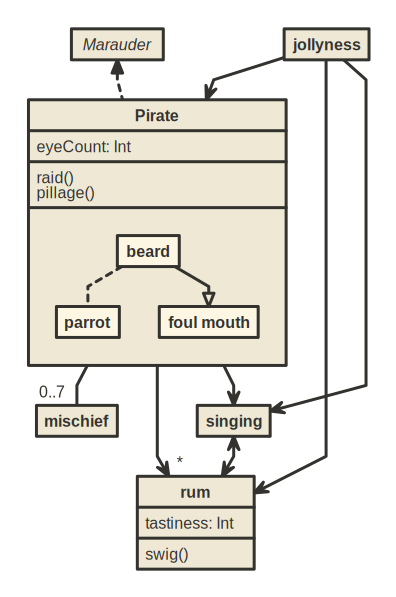

In [23]:
%%kroki nomnoml

[Pirate|eyeCount: Int|raid();pillage()|
  [beard]--[parrot]
  [beard]-:>[foul mouth]
]

[<abstract>Marauder]<:--[Pirate]
[Pirate]- 0..7[mischief]
[jollyness]->[Pirate]
[jollyness]->[rum]
[jollyness]->[singing]
[Pirate]-> *[rum|tastiness: Int|swig()]
[Pirate]->[singing]
[singing]<->[rum]

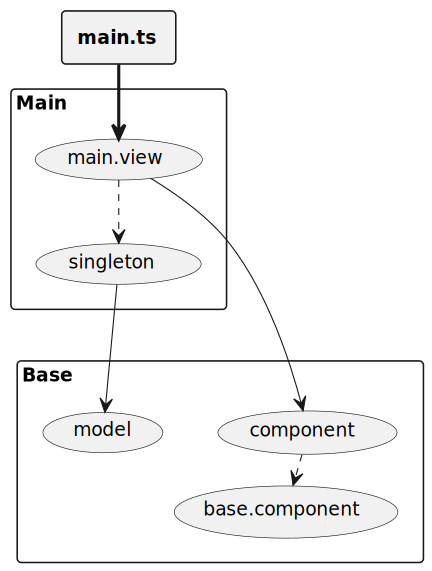

In [25]:
%%kroki

skinparam monochrome true
skinparam ranksep 20
skinparam dpi 150
skinparam arrowThickness 0.7
skinparam packageTitleAlignment left
skinparam usecaseBorderThickness 0.4
skinparam defaultFontSize 12
skinparam rectangleBorderThickness 1

rectangle "Main" {
  (main.view)
  (singleton)
}
rectangle "Base" {
  (base.component)
  (component)
  (model)
}
rectangle "<b>main.ts</b>" as main_ts

(component) ..> (base.component)
main_ts ==> (main.view)
(main.view) --> (component)
(main.view) ...> (singleton)
(singleton) ---> (model)

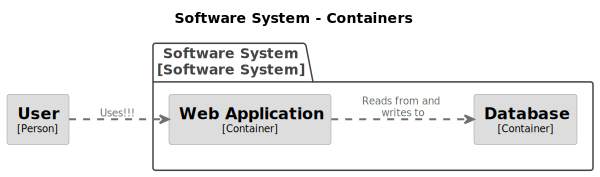

In [28]:
%%kroki structurizr

workspace {
    model { 
        user = person "User" 
        softwareSystem = softwareSystem "Software System" { 
            webapp = container "Web Application" { 
                user -> this "Uses!!!" 
            } 
            database = container "Database" { 
                webapp -> this "Reads from and writes to" 
            } 
        } 
    } 
    views { 
        systemContext softwareSystem { 
            include * 
            autolayout lr 
        } 
        container softwareSystem { 
            include * 
            autolayout lr 
        } 
        theme default 
    } 
}

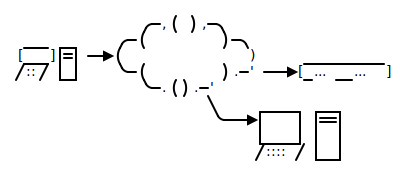

In [29]:
%%kroki svgbob

                  .-,(  ),-.
   ___  _      .-(          )-.
  [___]|=| -->(                )      __________
  /::/ |_|     '-(          ).-' --->[_...__... ]
                  '-.( ).-'
                          \      ____   __
                           '--->|    | |==|
                                |____| |  |
                                /::::/ |__|

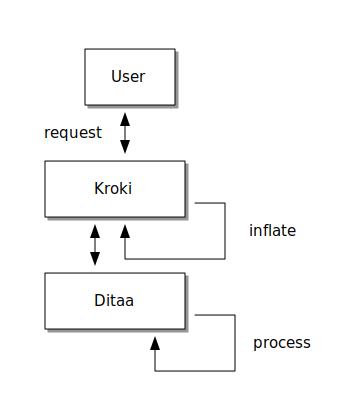

In [18]:
%%kroki ditaa

      +--------+
      |        |
      |  User  |
      |        |
      +--------+
          ^
  request |
          v
  +-------------+
  |             |
  |    Kroki    |
  |             |---+
  +-------------+   |
       ^  ^         | inflate
       |  |         |
       v  +---------+
  +-------------+
  |             |
  |    Ditaa    |
  |             |----+
  +-------------+    |
             ^       | process
             |       |
             +-------+


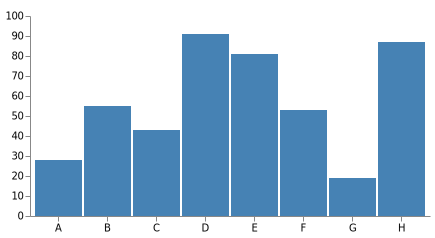

In [31]:
%%kroki vega

{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category": "A", "amount": 28},
        {"category": "B", "amount": 55},
        {"category": "C", "amount": 43},
        {"category": "D", "amount": 91},
        {"category": "E", "amount": 81},
        {"category": "F", "amount": 53},
        {"category": "G", "amount": 19},
        {"category": "H", "amount": 87}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.05,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "amount"},
      "nice": true,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "amount"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.category", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.amount", "offset": -2},
          "text": {"signal": "tooltip.amount"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}


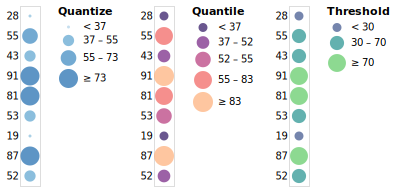

In [32]:
%%kroki vegalite

{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "Horizontally concatenated charts that show different types of discretizing scales.",
  "data": {
    "values": [
      {"a": "A", "b": 28},
      {"a": "B", "b": 55},
      {"a": "C", "b": 43},
      {"a": "D", "b": 91},
      {"a": "E", "b": 81},
      {"a": "F", "b": 53},
      {"a": "G", "b": 19},
      {"a": "H", "b": 87},
      {"a": "I", "b": 52}
    ]
  },
  "hconcat": [
    {
      "mark": "circle",
      "encoding": {
        "y": {
          "field": "b",
          "type": "nominal",
          "sort": null,
          "axis": {
            "ticks": false,
            "domain": false,
            "title": null
          }
        },
        "size": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "quantize"
          }
        },
        "color": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "quantize",
            "zero": true
          },
          "legend": {
            "title": "Quantize"
          }
        }
      }
    },
    {
      "mark": "circle",
      "encoding": {
        "y": {
          "field": "b",
          "type": "nominal",
          "sort": null,
          "axis": {
            "ticks": false,
            "domain": false,
            "title": null
          }
        },
        "size": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "quantile",
            "range": [80, 160, 240, 320, 400]
          }
        },
        "color": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "quantile",
            "scheme": "magma"
          },
          "legend": {
            "format": "d",
            "title": "Quantile"
          }
        }
      }
    },
    {
      "mark": "circle",
      "encoding": {
        "y": {
          "field": "b",
          "type": "nominal",
          "sort": null,
          "axis": {
            "ticks": false,
            "domain": false,
            "title": null
          }
        },
        "size": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "threshold",
            "domain": [30, 70],
            "range": [80, 200, 320]
          }
        },
        "color": {
          "field": "b",
          "type": "quantitative",
          "scale": {
            "type": "threshold",
            "domain": [30, 70],
            "scheme": "viridis"
          },
          "legend": {
            "title": "Threshold"
          }
        }
      }
    }
  ],
  "resolve": {
    "scale": {
      "color": "independent",
      "size": "independent"
    }
  }
}


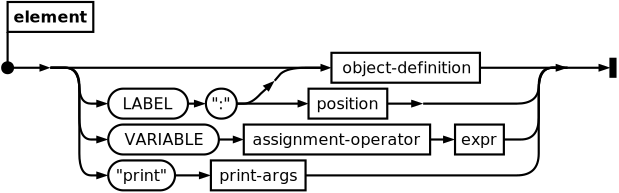

In [24]:
%%kroki pikchr

$r = 0.2in
linerad = 0.75*$r
linewid = 0.25

# Start and end blocks
#
box "element" bold fit
line down 50% from last box.sw
dot rad 250% color black
X0: last.e + (0.3,0)
arrow from last dot to X0
move right 3.9in
box wid 5% ht 25% fill black
X9: last.w - (0.3,0)
arrow from X9 to last box.w


# The main rule that goes straight through from start to finish
#
box "object-definition" italic fit at 11/16 way between X0 and X9
arrow to X9
arrow from X0 to last box.w

# The LABEL: rule
#
arrow right $r from X0 then down 1.25*$r then right $r
oval " LABEL " fit
arrow 50%
oval "\":\"" fit
arrow 200%
box "position" italic fit
arrow
line right until even with X9 - ($r,0) \
  then up until even with X9 then to X9
arrow from last oval.e right $r*0.5 then up $r*0.8 right $r*0.8
line up $r*0.45 right $r*0.45 then right

# The VARIABLE = rule
#
arrow right $r from X0 then down 2.5*$r then right $r
oval " VARIABLE " fit
arrow 70%
box "assignment-operator" italic fit
arrow 70%
box "expr" italic fit
line right until even with X9 - ($r,0) \
  then up until even with X9 then to X9

# The PRINT rule
#
arrow right $r from X0 then down 3.75*$r then right $r
oval "\"print\"" fit
arrow
box "print-args" italic fit
line right until even with X9 - ($r,0) \
  then up until even with X9 then to X9

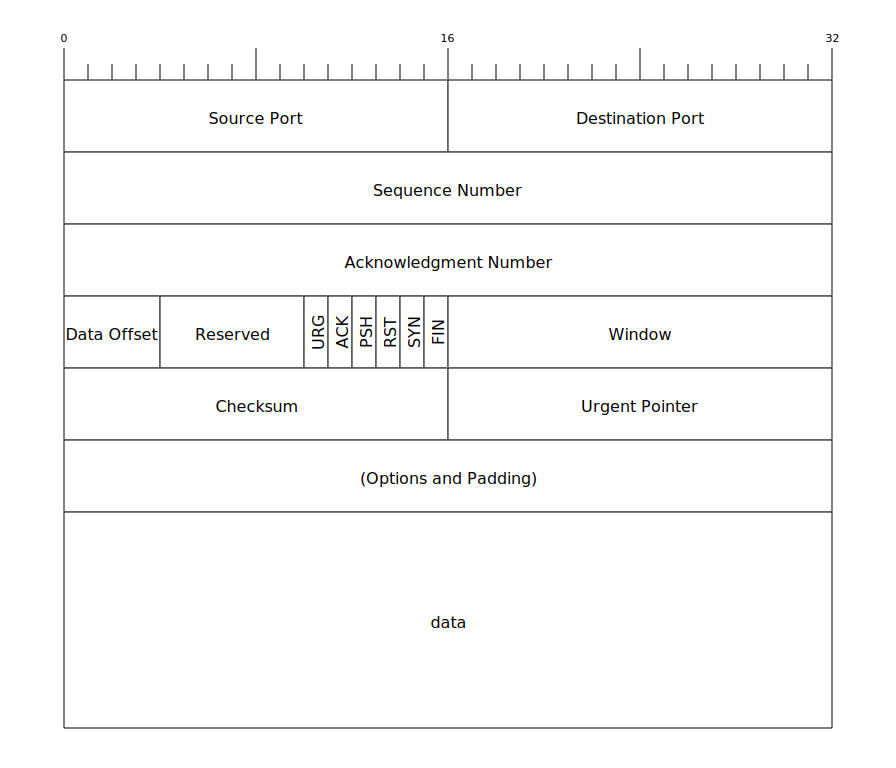

In [15]:
%%kroki packetdiag

packetdiag {
  colwidth = 32;
  node_height = 72;

  0-15: Source Port;
  16-31: Destination Port;
  32-63: Sequence Number;
  64-95: Acknowledgment Number;
  96-99: Data Offset;
  100-105: Reserved;
  106: URG [rotate = 270];
  107: ACK [rotate = 270];
  108: PSH [rotate = 270];
  109: RST [rotate = 270];
  110: SYN [rotate = 270];
  111: FIN [rotate = 270];
  112-127: Window;
  128-143: Checksum;
  144-159: Urgent Pointer;
  160-191: (Options and Padding);
  192-223: data [colheight = 3];
}

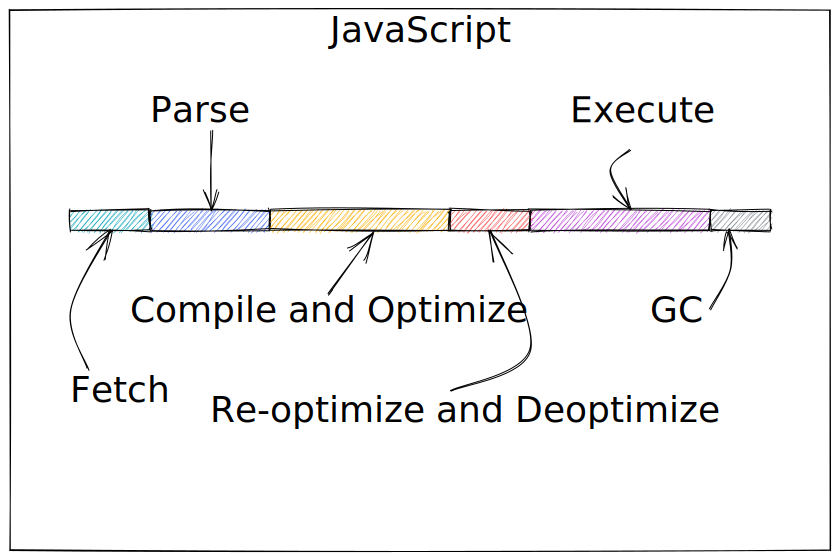

In [20]:
%%kroki excalidraw

{
  "type": "excalidraw",
  "version": 2,
  "source": "https://excalidraw.com",
  "elements": [
    {
      "type": "rectangle",
      "version": 175,
      "versionNonce": 279344008,
      "isDeleted": false,
      "id": "2ZYh24ed28FJ0yE-S3YNY",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 580,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#15aabf",
      "width": 80,
      "height": 19.999999999999996,
      "seed": 521916552,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "Be1y2yzhV3Zd4nwCro__8"
      ]
    },
    {
      "type": "rectangle",
      "version": 180,
      "versionNonce": 164784376,
      "isDeleted": false,
      "id": "bO0OVt6m7LowYpq22ePCA",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 660,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#4c6ef5",
      "width": 120,
      "height": 19.999999999999996,
      "seed": 1303206904,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "KaCO9-QjUenSyCuuanoTo"
      ]
    },
    {
      "type": "rectangle",
      "version": 183,
      "versionNonce": 27181704,
      "isDeleted": false,
      "id": "jz0Huq9-s6pNxDw0RqHcR",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 780,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#fab005",
      "width": 180,
      "height": 19.999999999999996,
      "seed": 861962120,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "74ifmqmu0vN0NK0_0FwPm"
      ]
    },
    {
      "type": "rectangle",
      "version": 192,
      "versionNonce": 2123008504,
      "isDeleted": false,
      "id": "UnmNTmwJtm6moubcGtSgB",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 960,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#fa5252",
      "width": 80,
      "height": 19.999999999999996,
      "seed": 277814520,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "1v60NED2criGG-wo9-oQL"
      ]
    },
    {
      "type": "rectangle",
      "version": 202,
      "versionNonce": 1823814024,
      "isDeleted": false,
      "id": "of76J4WOJHnHi0L61Vst_",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1040,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#be4bdb",
      "width": 180,
      "height": 19.999999999999996,
      "seed": 1496796808,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "jjuPzyRneMv3f65lps_6a"
      ]
    },
    {
      "type": "rectangle",
      "version": 193,
      "versionNonce": 1234602744,
      "isDeleted": false,
      "id": "SlvbjeV-9lXbcrlKib-hj",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1220,
      "y": 140,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 60,
      "height": 19.999999999999996,
      "seed": 1938865656,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "5QQzhw_uqk_rBaW2wMriT"
      ]
    },
    {
      "type": "text",
      "version": 81,
      "versionNonce": 1188901129,
      "isDeleted": false,
      "id": "vrdt3JfbD2Xwz4K4TWScI",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 840,
      "y": -60,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 190,
      "height": 45,
      "seed": 1499217288,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "JavaScript",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "arrow",
      "version": 343,
      "versionNonce": 1369065096,
      "isDeleted": false,
      "id": "Be1y2yzhV3Zd4nwCro__8",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 597.5075333823274,
      "y": 299,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 40,
      "height": 139,
      "seed": 666255096,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": {
        "focus": -0.41953339688473495,
        "gap": 1,
        "elementId": "UxgtvUBaIPnDWJZ9kUQH8"
      },
      "endBinding": {
        "focus": -0.11111111111111113,
        "gap": 1,
        "elementId": "2ZYh24ed28FJ0yE-S3YNY"
      },
      "points": [
        [
          0,
          0
        ],
        [
          -17.507533382327438,
          -59
        ],
        [
          22.492466617672562,
          -139
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 81,
      "versionNonce": 690339976,
      "isDeleted": false,
      "id": "UxgtvUBaIPnDWJZ9kUQH8",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 580,
      "y": 300,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 94,
      "height": 45,
      "seed": 84626568,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "Be1y2yzhV3Zd4nwCro__8"
      ],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "Fetch",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "rectangle",
      "version": 60,
      "versionNonce": 897215480,
      "isDeleted": false,
      "id": "-Lq0agjWQ31TR_Av5Z4HW",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 520,
      "y": -60,
      "strokeColor": "#000000",
      "backgroundColor": "transparent",
      "width": 820,
      "height": 540,
      "seed": 495165432,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "jjuPzyRneMv3f65lps_6a"
      ]
    },
    {
      "type": "arrow",
      "version": 537,
      "versionNonce": 1626949112,
      "isDeleted": false,
      "id": "KaCO9-QjUenSyCuuanoTo",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 721.0588599991052,
      "y": 60.17790458606555,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 1.0588599991051524,
      "height": 79.82209541393445,
      "seed": 637565832,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": null,
      "endBinding": {
        "focus": 0,
        "gap": 1,
        "elementId": "bO0OVt6m7LowYpq22ePCA"
      },
      "points": [
        [
          0,
          0
        ],
        [
          -1.0588599991051524,
          39.82209541393445
        ],
        [
          -1.0588599991051524,
          79.82209541393445
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 112,
      "versionNonce": 358083143,
      "isDeleted": false,
      "id": "4hEOdlcwK6AHyVhjc-MXS",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 660,
      "y": 20,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 103,
      "height": 45,
      "seed": 352116984,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "Parse",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "arrow",
      "version": 534,
      "versionNonce": 983577992,
      "isDeleted": false,
      "id": "74ifmqmu0vN0NK0_0FwPm",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 841.6574209245741,
      "y": 219,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 43.15128973100309,
      "height": 59.174989629909305,
      "seed": 1853344392,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": {
        "focus": 0.09211398277003865,
        "gap": 1,
        "elementId": "K4so-arfr0JX0NJx8vd7T"
      },
      "endBinding": {
        "focus": -0.2163077865936296,
        "gap": 1,
        "elementId": "jz0Huq9-s6pNxDw0RqHcR"
      },
      "points": [
        [
          0,
          0
        ],
        [
          -1.6574209245741258,
          1
        ],
        [
          41.493868806428964,
          -58.174989629909305
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 118,
      "versionNonce": 1185705864,
      "isDeleted": false,
      "id": "K4so-arfr0JX0NJx8vd7T",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 640,
      "y": 220,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 366,
      "height": 45,
      "seed": 765854200,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "74ifmqmu0vN0NK0_0FwPm"
      ],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "Compile and Optimize",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "arrow",
      "version": 791,
      "versionNonce": 1724761848,
      "isDeleted": false,
      "id": "1v60NED2criGG-wo9-oQL",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 960,
      "y": 320,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 80,
      "height": 160,
      "seed": 1764571528,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": {
        "focus": -0.1637630662020906,
        "gap": 1,
        "elementId": "dviXudWNxiHYQMZfqHWsH"
      },
      "endBinding": {
        "focus": 0.07692307692307691,
        "gap": 1,
        "elementId": "UnmNTmwJtm6moubcGtSgB"
      },
      "points": [
        [
          0,
          0
        ],
        [
          80,
          -40
        ],
        [
          40,
          -160
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 194,
      "versionNonce": 473574648,
      "isDeleted": false,
      "id": "dviXudWNxiHYQMZfqHWsH",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 720,
      "y": 320,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 484,
      "height": 45,
      "seed": 1988297464,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "1v60NED2criGG-wo9-oQL"
      ],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "Re-optimize and Deoptimize",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "arrow",
      "version": 708,
      "versionNonce": 185615496,
      "isDeleted": false,
      "id": "jjuPzyRneMv3f65lps_6a",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1140,
      "y": 80,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 20,
      "height": 60,
      "seed": 1767688328,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": {
        "focus": -0.3021784319542362,
        "gap": 14.800415739789742,
        "elementId": "qhkjvI1VmWZdnKvU5QKZK"
      },
      "endBinding": {
        "focus": 0.15789473684210528,
        "gap": 1,
        "elementId": "of76J4WOJHnHi0L61Vst_"
      },
      "points": [
        [
          0,
          0
        ],
        [
          -20,
          20
        ],
        [
          0,
          60
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 213,
      "versionNonce": 2105884296,
      "isDeleted": false,
      "id": "qhkjvI1VmWZdnKvU5QKZK",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1080,
      "y": 20.19958426021026,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 139,
      "height": 45,
      "seed": 2115494904,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "jjuPzyRneMv3f65lps_6a"
      ],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "Execute",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    },
    {
      "type": "arrow",
      "version": 707,
      "versionNonce": 543827960,
      "isDeleted": false,
      "id": "5QQzhw_uqk_rBaW2wMriT",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1220,
      "y": 240,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 20,
      "height": 80,
      "seed": 2059564936,
      "groupIds": [],
      "strokeSharpness": "round",
      "boundElementIds": [],
      "startBinding": {
        "focus": 0.7391304347826086,
        "gap": 2,
        "elementId": "C6fyzTg2FHAmrRYfC_THm"
      },
      "endBinding": {
        "focus": 0.3333333333333333,
        "gap": 1,
        "elementId": "SlvbjeV-9lXbcrlKib-hj"
      },
      "points": [
        [
          0,
          0
        ],
        [
          20,
          -40
        ],
        [
          20,
          -80
        ]
      ],
      "lastCommittedPoint": null,
      "startArrowhead": null,
      "endArrowhead": "arrow"
    },
    {
      "type": "text",
      "version": 227,
      "versionNonce": 2002374136,
      "isDeleted": false,
      "id": "C6fyzTg2FHAmrRYfC_THm",
      "fillStyle": "hachure",
      "strokeWidth": 1,
      "strokeStyle": "solid",
      "roughness": 1,
      "opacity": 100,
      "angle": 0,
      "x": 1160,
      "y": 220,
      "strokeColor": "#000000",
      "backgroundColor": "#868e96",
      "width": 58,
      "height": 45,
      "seed": 1651025144,
      "groupIds": [],
      "strokeSharpness": "sharp",
      "boundElementIds": [
        "5QQzhw_uqk_rBaW2wMriT"
      ],
      "fontSize": 36,
      "fontFamily": 1,
      "text": "GC",
      "baseline": 32,
      "textAlign": "left",
      "verticalAlign": "top"
    }
  ],
  "appState": {
    "viewBackgroundColor": "#ffffff",
    "gridSize": 20
  }
}

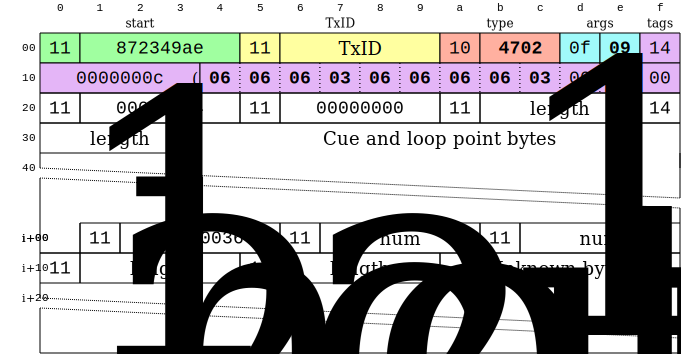

In [11]:
%%kroki bytefield

(defattrs :bg-green {:fill "#a0ffa0"})
(defattrs :bg-yellow {:fill "#ffffa0"})
(defattrs :bg-pink {:fill "#ffb0a0"})
(defattrs :bg-cyan {:fill "#a0fafa"})
(defattrs :bg-purple {:fill "#e4b5f7"})

(defn draw-group-label-header
  [span label]
  (draw-box (text label [:math {:font-size 12}]) {:span span :borders #{} :height 14}))

(defn draw-remotedb-header
  [kind args]
  (draw-column-headers)
  (draw-group-label-header 5 "start")
  (draw-group-label-header 5 "TxID")
  (draw-group-label-header 3 "type")
  (draw-group-label-header 2 "args")
  (draw-group-label-header 1 "tags")
  (next-row 18)

  (draw-box 0x11 :bg-green)
  (draw-box 0x872349ae [{:span 4} :bg-green])
  (draw-box 0x11 :bg-yellow)
  (draw-box (text "TxID" :math) [{:span 4} :bg-yellow])
  (draw-box 0x10 :bg-pink)
  (draw-box (hex-text kind 4 :bold) [{:span 2} :bg-pink])
  (draw-box 0x0f :bg-cyan)
  (draw-box (hex-text args 2 :bold) :bg-cyan)
  (draw-box 0x14 :bg-purple)

  (draw-box (text "0000000c" :hex [[:plain {:font-weight "light" :font-size 16}] " (12)"]) [{:span 4} :bg-purple])
  (draw-box (hex-text 6 2 :bold) [:box-first :bg-purple])
  (doseq [val [6 6 3 6 6 6 6 3]]
    (draw-box (hex-text val 2 :bold) [:box-related :bg-purple]))
  (doseq [val [0 0]]
    (draw-box val [:box-related :bg-purple]))
  (draw-box 0 [:box-last :bg-purple]))

(draw-remotedb-header 0x4702 9)

(draw-box 0x11)
(draw-box 0x2104 {:span 4})
(draw-box 0x11)
(draw-box 0 {:span 4})
(draw-box 0x11)
(draw-box (text "length" [:math] [:sub 1]) {:span 4})
(draw-box 0x14)

(draw-box (text "length" [:math] [:sub 1]) {:span 4})
(draw-gap "Cue and loop point bytes")

(draw-box nil :box-below)
(draw-box 0x11)
(draw-box 0x36 {:span 4})
(draw-box 0x11)
(draw-box (text "num" [:math] [:sub "hot"]) {:span 4})
(draw-box 0x11)
(draw-box (text "num" [:math] [:sub "cue"]) {:span 4})

(draw-box 0x11)
(draw-box (text "length" [:math] [:sub 2]) {:span 4})
(draw-box 0x14)
(draw-box (text "length" [:math] [:sub 2]) {:span 4})
(draw-gap "Unknown bytes" {:min-label-columns 6})
(draw-bottom)


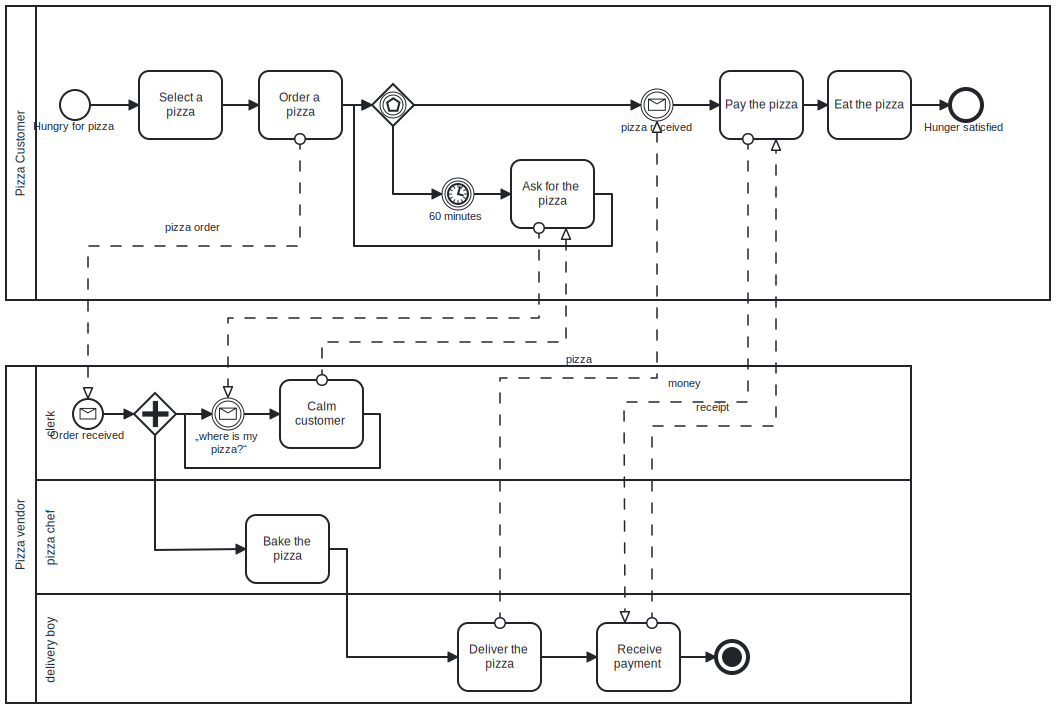

In [9]:
%%kroki bpmn

<?xml version="1.0" encoding="UTF-8"?>
<semantic:definitions xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:di="http://www.omg.org/spec/DD/20100524/DI" xmlns:bpmndi="http://www.omg.org/spec/BPMN/20100524/DI" xmlns:dc="http://www.omg.org/spec/DD/20100524/DC" xmlns:semantic="http://www.omg.org/spec/BPMN/20100524/MODEL" id="_1275940932088" targetNamespace="http://www.trisotech.com/definitions/_1275940932088" exporter="Camunda Modeler" exporterVersion="1.16.0">
  <semantic:message id="_1275940932310" />
  <semantic:message id="_1275940932433" />
  <semantic:process id="_6-1" isExecutable="false">
    <semantic:laneSet id="ls_6-438">
      <semantic:lane id="_6-650" name="clerk">
        <semantic:flowNodeRef>OrderReceivedEvent</semantic:flowNodeRef>
        <semantic:flowNodeRef>_6-652</semantic:flowNodeRef>
        <semantic:flowNodeRef>_6-674</semantic:flowNodeRef>
        <semantic:flowNodeRef>CalmCustomerTask</semantic:flowNodeRef>
      </semantic:lane>
      <semantic:lane id="_6-446" name="pizza chef">
        <semantic:flowNodeRef>_6-463</semantic:flowNodeRef>
      </semantic:lane>
      <semantic:lane id="_6-448" name="delivery boy">
        <semantic:flowNodeRef>_6-514</semantic:flowNodeRef>
        <semantic:flowNodeRef>_6-565</semantic:flowNodeRef>
        <semantic:flowNodeRef>_6-616</semantic:flowNodeRef>
      </semantic:lane>
    </semantic:laneSet>
    <semantic:startEvent id="OrderReceivedEvent" name="Order received">
      <semantic:outgoing>_6-630</semantic:outgoing>
      <semantic:messageEventDefinition messageRef="_1275940932310" />
    </semantic:startEvent>
    <semantic:parallelGateway id="_6-652" name="">
      <semantic:incoming>_6-630</semantic:incoming>
      <semantic:outgoing>_6-691</semantic:outgoing>
      <semantic:outgoing>_6-693</semantic:outgoing>
    </semantic:parallelGateway>
    <semantic:intermediateCatchEvent id="_6-674" name="„where is my pizza?“">
      <semantic:incoming>_6-691</semantic:incoming>
      <semantic:incoming>_6-746</semantic:incoming>
      <semantic:outgoing>_6-748</semantic:outgoing>
      <semantic:messageEventDefinition messageRef="_1275940932433" />
    </semantic:intermediateCatchEvent>
    <semantic:task id="CalmCustomerTask" name="Calm customer">
      <semantic:incoming>_6-748</semantic:incoming>
      <semantic:outgoing>_6-746</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-463" name="Bake the pizza">
      <semantic:incoming>_6-693</semantic:incoming>
      <semantic:outgoing>_6-632</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-514" name="Deliver the pizza">
      <semantic:incoming>_6-632</semantic:incoming>
      <semantic:outgoing>_6-634</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-565" name="Receive payment">
      <semantic:incoming>_6-634</semantic:incoming>
      <semantic:outgoing>_6-636</semantic:outgoing>
    </semantic:task>
    <semantic:endEvent id="_6-616" name="">
      <semantic:incoming>_6-636</semantic:incoming>
      <semantic:terminateEventDefinition />
    </semantic:endEvent>
    <semantic:sequenceFlow id="_6-630" name="" sourceRef="OrderReceivedEvent" targetRef="_6-652" />
    <semantic:sequenceFlow id="_6-632" name="" sourceRef="_6-463" targetRef="_6-514" />
    <semantic:sequenceFlow id="_6-634" name="" sourceRef="_6-514" targetRef="_6-565" />
    <semantic:sequenceFlow id="_6-636" name="" sourceRef="_6-565" targetRef="_6-616" />
    <semantic:sequenceFlow id="_6-691" name="" sourceRef="_6-652" targetRef="_6-674" />
    <semantic:sequenceFlow id="_6-693" name="" sourceRef="_6-652" targetRef="_6-463" />
    <semantic:sequenceFlow id="_6-746" name="" sourceRef="CalmCustomerTask" targetRef="_6-674" />
    <semantic:sequenceFlow id="_6-748" name="" sourceRef="_6-674" targetRef="CalmCustomerTask" />
  </semantic:process>
  <semantic:message id="_1275940932198" />
  <semantic:process id="_6-2" isExecutable="false">
    <semantic:startEvent id="_6-61" name="Hungry for pizza">
      <semantic:outgoing>_6-125</semantic:outgoing>
    </semantic:startEvent>
    <semantic:task id="SelectAPizzaTask" name="Select a pizza">
      <semantic:incoming>_6-125</semantic:incoming>
      <semantic:outgoing>_6-178</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-127" name="Order a pizza">
      <semantic:incoming>_6-178</semantic:incoming>
      <semantic:outgoing>_6-420</semantic:outgoing>
    </semantic:task>
    <semantic:eventBasedGateway id="_6-180" name="">
      <semantic:incoming>_6-420</semantic:incoming>
      <semantic:incoming>_6-430</semantic:incoming>
      <semantic:outgoing>_6-422</semantic:outgoing>
      <semantic:outgoing>_6-424</semantic:outgoing>
    </semantic:eventBasedGateway>
    <semantic:intermediateCatchEvent id="_6-202" name="pizza received">
      <semantic:incoming>_6-422</semantic:incoming>
      <semantic:outgoing>_6-428</semantic:outgoing>
      <semantic:messageEventDefinition messageRef="_1275940932198" />
    </semantic:intermediateCatchEvent>
    <semantic:intermediateCatchEvent id="_6-219" name="60 minutes">
      <semantic:incoming>_6-424</semantic:incoming>
      <semantic:outgoing>_6-426</semantic:outgoing>
      <semantic:timerEventDefinition>
        <semantic:timeDate />
      </semantic:timerEventDefinition>
    </semantic:intermediateCatchEvent>
    <semantic:task id="_6-236" name="Ask for the pizza">
      <semantic:incoming>_6-426</semantic:incoming>
      <semantic:outgoing>_6-430</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-304" name="Pay the pizza">
      <semantic:incoming>_6-428</semantic:incoming>
      <semantic:outgoing>_6-434</semantic:outgoing>
    </semantic:task>
    <semantic:task id="_6-355" name="Eat the pizza">
      <semantic:incoming>_6-434</semantic:incoming>
      <semantic:outgoing>_6-436</semantic:outgoing>
    </semantic:task>
    <semantic:endEvent id="_6-406" name="Hunger satisfied">
      <semantic:incoming>_6-436</semantic:incoming>
    </semantic:endEvent>
    <semantic:sequenceFlow id="_6-125" name="" sourceRef="_6-61" targetRef="SelectAPizzaTask" />
    <semantic:sequenceFlow id="_6-178" name="" sourceRef="SelectAPizzaTask" targetRef="_6-127" />
    <semantic:sequenceFlow id="_6-420" name="" sourceRef="_6-127" targetRef="_6-180" />
    <semantic:sequenceFlow id="_6-422" name="" sourceRef="_6-180" targetRef="_6-202" />
    <semantic:sequenceFlow id="_6-424" name="" sourceRef="_6-180" targetRef="_6-219" />
    <semantic:sequenceFlow id="_6-426" name="" sourceRef="_6-219" targetRef="_6-236" />
    <semantic:sequenceFlow id="_6-428" name="" sourceRef="_6-202" targetRef="_6-304" />
    <semantic:sequenceFlow id="_6-430" name="" sourceRef="_6-236" targetRef="_6-180" />
    <semantic:sequenceFlow id="_6-434" name="" sourceRef="_6-304" targetRef="_6-355" />
    <semantic:sequenceFlow id="_6-436" name="" sourceRef="_6-355" targetRef="_6-406" />
  </semantic:process>
  <semantic:collaboration id="C1275940932557">
    <semantic:participant id="_6-53" name="Pizza Customer" processRef="_6-2" />
    <semantic:participant id="_6-438" name="Pizza vendor" processRef="_6-1" />
    <semantic:messageFlow id="_6-638" name="pizza order" sourceRef="_6-127" targetRef="OrderReceivedEvent" />
    <semantic:messageFlow id="_6-642" name="" sourceRef="_6-236" targetRef="_6-674" />
    <semantic:messageFlow id="_6-646" name="receipt" sourceRef="_6-565" targetRef="_6-304" />
    <semantic:messageFlow id="_6-648" name="money" sourceRef="_6-304" targetRef="_6-565" />
    <semantic:messageFlow id="_6-640" name="pizza" sourceRef="_6-514" targetRef="_6-202" />
    <semantic:messageFlow id="_6-750" name="" sourceRef="CalmCustomerTask" targetRef="_6-236" />
  </semantic:collaboration>
  <bpmndi:BPMNDiagram id="Trisotech.Visio-_6" name="Untitled Diagram" documentation="" resolution="96.00000267028808">
    <bpmndi:BPMNPlane bpmnElement="C1275940932557">
      <bpmndi:BPMNShape id="Trisotech.Visio__6-53" bpmnElement="_6-53" isHorizontal="true">
        <dc:Bounds x="12" y="12" width="1044" height="294" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6-438" bpmnElement="_6-438" isHorizontal="true">
        <dc:Bounds x="12" y="372" width="905" height="337" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-650" bpmnElement="_6-650" isHorizontal="true">
        <dc:Bounds x="42" y="372" width="875" height="114" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-446" bpmnElement="_6-446" isHorizontal="true">
        <dc:Bounds x="42" y="486" width="875" height="114" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-448" bpmnElement="_6-448" isHorizontal="true">
        <dc:Bounds x="42" y="600" width="875" height="109" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6_OrderReceivedEvent" bpmnElement="OrderReceivedEvent">
        <dc:Bounds x="79" y="405" width="30" height="30" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-652" bpmnElement="_6-652">
        <dc:Bounds x="140" y="399" width="42" height="42" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-674" bpmnElement="_6-674">
        <dc:Bounds x="218" y="404" width="32" height="32" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6_CalmCustomerTask" bpmnElement="CalmCustomerTask">
        <dc:Bounds x="286" y="386" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-463" bpmnElement="_6-463">
        <dc:Bounds x="252" y="521" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-514" bpmnElement="_6-514">
        <dc:Bounds x="464" y="629" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-565" bpmnElement="_6-565">
        <dc:Bounds x="603" y="629" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-616" bpmnElement="_6-616">
        <dc:Bounds x="722" y="647" width="32" height="32" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-61" bpmnElement="_6-61">
        <dc:Bounds x="66" y="96" width="30" height="30" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-74" bpmnElement="SelectAPizzaTask">
        <dc:Bounds x="145" y="77" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-127" bpmnElement="_6-127">
        <dc:Bounds x="265" y="77" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-180" bpmnElement="_6-180">
        <dc:Bounds x="378" y="90" width="42" height="42" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-202" bpmnElement="_6-202">
        <dc:Bounds x="647" y="95" width="32" height="32" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-219" bpmnElement="_6-219">
        <dc:Bounds x="448" y="184" width="32" height="32" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-236" bpmnElement="_6-236">
        <dc:Bounds x="517" y="166" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-304" bpmnElement="_6-304">
        <dc:Bounds x="726" y="77" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-355" bpmnElement="_6-355">
        <dc:Bounds x="834" y="77" width="83" height="68" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNShape id="Trisotech.Visio__6__6-406" bpmnElement="_6-406">
        <dc:Bounds x="956" y="95" width="32" height="32" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNShape>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-640" bpmnElement="_6-640">
        <di:waypoint x="506" y="629" />
        <di:waypoint x="506" y="384" />
        <di:waypoint x="663" y="384" />
        <di:waypoint x="663" y="127" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-630" bpmnElement="_6-630">
        <di:waypoint x="109" y="420" />
        <di:waypoint x="140" y="420" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-691" bpmnElement="_6-691">
        <di:waypoint x="182" y="420" />
        <di:waypoint x="200" y="420" />
        <di:waypoint x="218" y="420" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-648" bpmnElement="_6-648">
        <di:waypoint x="754" y="145" />
        <di:waypoint x="754" y="408" />
        <di:waypoint x="630" y="408" />
        <di:waypoint x="631" y="629" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-422" bpmnElement="_6-422">
        <di:waypoint x="420" y="111" />
        <di:waypoint x="438" y="111" />
        <di:waypoint x="647" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-646" bpmnElement="_6-646" messageVisibleKind="non_initiating">
        <di:waypoint x="658" y="629" />
        <di:waypoint x="658" y="432" />
        <di:waypoint x="782" y="432" />
        <di:waypoint x="782" y="145" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-428" bpmnElement="_6-428">
        <di:waypoint x="679" y="111" />
        <di:waypoint x="726" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-748" bpmnElement="_6-748">
        <di:waypoint x="250" y="420" />
        <di:waypoint x="268" y="420" />
        <di:waypoint x="286" y="420" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-420" bpmnElement="_6-420">
        <di:waypoint x="348" y="111" />
        <di:waypoint x="366" y="111" />
        <di:waypoint x="378" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-636" bpmnElement="_6-636">
        <di:waypoint x="686" y="663" />
        <di:waypoint x="704" y="663" />
        <di:waypoint x="722" y="663" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-750" bpmnElement="_6-750">
        <di:waypoint x="328" y="386" />
        <di:waypoint x="328" y="348" />
        <di:waypoint x="572" y="348" />
        <di:waypoint x="572" y="234" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-436" bpmnElement="_6-436">
        <di:waypoint x="918" y="111" />
        <di:waypoint x="936" y="111" />
        <di:waypoint x="956" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-632" bpmnElement="_6-632">
        <di:waypoint x="335" y="555" />
        <di:waypoint x="353" y="555" />
        <di:waypoint x="353" y="663" />
        <di:waypoint x="464" y="663" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-634" bpmnElement="_6-634">
        <di:waypoint x="548" y="663" />
        <di:waypoint x="603" y="663" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-125" bpmnElement="_6-125">
        <di:waypoint x="96" y="111" />
        <di:waypoint x="114" y="111" />
        <di:waypoint x="145" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-430" bpmnElement="_6-430">
        <di:waypoint x="600" y="200" />
        <di:waypoint x="618" y="200" />
        <di:waypoint x="618" y="252" />
        <di:waypoint x="576" y="252" />
        <di:waypoint x="549" y="252" />
        <di:waypoint x="360" y="252" />
        <di:waypoint x="360" y="111" />
        <di:waypoint x="378" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-642" bpmnElement="_6-642">
        <di:waypoint x="545" y="234" />
        <di:waypoint x="545" y="324" />
        <di:waypoint x="234" y="324" />
        <di:waypoint x="234" y="404" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-424" bpmnElement="_6-424">
        <di:waypoint x="399" y="132" />
        <di:waypoint x="399" y="200" />
        <di:waypoint x="448" y="200" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-638" bpmnElement="_6-638">
        <di:waypoint x="306" y="145" />
        <di:waypoint x="306" y="252" />
        <di:waypoint x="94" y="252" />
        <di:waypoint x="94" y="405" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-426" bpmnElement="_6-426">
        <di:waypoint x="480" y="200" />
        <di:waypoint x="498" y="200" />
        <di:waypoint x="517" y="200" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-693" bpmnElement="_6-693">
        <di:waypoint x="161" y="441" />
        <di:waypoint x="161" y="556" />
        <di:waypoint x="252" y="555" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-178" bpmnElement="_6-178">
        <di:waypoint x="228" y="111" />
        <di:waypoint x="265" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-746" bpmnElement="_6-746">
        <di:waypoint x="370" y="420" />
        <di:waypoint x="386" y="420" />
        <di:waypoint x="386" y="474" />
        <di:waypoint x="191" y="474" />
        <di:waypoint x="191" y="420" />
        <di:waypoint x="218" y="420" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
      <bpmndi:BPMNEdge id="Trisotech.Visio__6__6-434" bpmnElement="_6-434">
        <di:waypoint x="810" y="111" />
        <di:waypoint x="834" y="111" />
        <bpmndi:BPMNLabel />
      </bpmndi:BPMNEdge>
    </bpmndi:BPMNPlane>
  </bpmndi:BPMNDiagram>
</semantic:definitions>


# Appendix

## parsing out the diagram kinds and corresponding output_formats

This section is just to show how I semi-automatically made the `output_formats` dictionary, which contains both the choices of `diagram_type` (as keys) and the corresponding `output_format` each support (as values).

In [1]:
import qo
qo.find_names('table')

['get_tables_from_url', 'all_table_of_contents_html_from_notebooks']

In [2]:
output_formats_df = qo.get_tables_from_url('https://kroki.io/')[0]
output_formats_df

,Diagram Type,png,svg,jpeg,pdf,base64
0,BlockDiag,✔️,✔️,NaN,✔️,️
1,BPMN,️,✔️,NaN,️,️
2,Bytefield,️,✔️,NaN,️,️
3,SeqDiag,✔️,✔️,NaN,✔️,️
4,ActDiag,✔️,✔️,NaN,✔️,️
5,NwDiag,✔️,✔️,NaN,✔️,️
6,PacketDiag,✔️,✔️,NaN,✔️,️
7,RackDiag,✔️,✔️,NaN,✔️,️
8,C4 with PlantUML,✔️,✔️,✔️,️,✔️
9,Ditaa,✔️,✔️,NaN,️,️


In [11]:
t = output_formats_df.set_index('Diagram Type') == '✔️'
t = t.to_dict(orient='index')
process_key = lambda k: (k.lower()
    .replace('-', '')
    .replace(' ', '')
    .replace('c4withplantuml', 'c4plantuml')
)
process_val = lambda v: [key for key, tf in v.items() if tf is True]
output_formats = {process_key(k): process_val(v) for k, v in t.items()}
output_formats

{'blockdiag': ['png', 'svg', 'pdf'],
 'bpmn': ['svg'],
 'bytefield': ['svg'],
 'seqdiag': ['png', 'svg', 'pdf'],
 'actdiag': ['png', 'svg', 'pdf'],
 'nwdiag': ['png', 'svg', 'pdf'],
 'packetdiag': ['png', 'svg', 'pdf'],
 'rackdiag': ['png', 'svg', 'pdf'],
 'c4plantuml': ['png', 'svg', 'jpeg', 'base64'],
 'ditaa': ['png', 'svg'],
 'erd': ['png', 'svg', 'jpeg', 'pdf'],
 'excalidraw': ['svg'],
 'graphviz': ['png', 'svg', 'jpeg', 'pdf'],
 'mermaid': ['svg'],
 'nomnoml': ['svg'],
 'pikchr': ['svg'],
 'plantuml': ['png', 'svg', 'jpeg', 'base64'],
 'structurizr': ['svg'],
 'svgbob': ['svg'],
 'umlet': ['png', 'svg', 'jpeg'],
 'vega': ['png', 'svg', 'pdf'],
 'vegalite': ['png', 'svg', 'pdf'],
 'wavedrom': ['svg']}

23

In [13]:
diagrams_supported = set(['blockdiag', 'seqdiag', 'mermaid', 'actdiag', 'nwdiag',
                          'packetdiag', 'rackdiag', 'erd', 'nomnoml', 'plantuml',
                          'umlet', 'wavedrom', 'bpmn', 'bytefield', 'pikchr',
                          'graphviz', 'vega', 'vega-lite', 'ditaa', 'svgbob'])

print(len(output_formats), len(diagrams_supported))
set(output_formats) - diagrams_supported

23 20


{'c4plantuml', 'excalidraw', 'structurizr', 'vegalite'}

In [10]:
<textarea id="diagram-source" class="textarea code" placeholder="" rows="25">skinparam monochrome true
skinparam ranksep 20
skinparam dpi 150
skinparam arrowThickness 0.7
skinparam packageTitleAlignment left
skinparam usecaseBorderThickness 0.4
skinparam defaultFontSize 12
skinparam rectangleBorderThickness 1

rectangle "Main" {
  (main.view)
  (singleton)
}
rectangle "Base" {
  (base.component)
  (component)
  (model)
}
rectangle "&lt;b&gt;main.ts&lt;/b&gt;" as main_ts

(component) ..&gt; (base.component)
main_ts ==&gt; (main.view)
(main.view) --&gt; (component)
(main.view) ...&gt; (singleton)
(singleton) ---&gt; (model)</textarea>

{'c4plantuml', 'excalidraw', 'structurizr', 'vegalite'}

In [14]:
diagrams_supported - set(output_formats)

{'vega-lite'}

# Misc

In [7]:
%load_ext kroki

At this point, mermaid displays change the font color of cell outputs, so to avoid this if you need to, you can try translating mermaid code to graphviz code:

In [6]:
mermaid_code = '''
graph TD
    A[Score] --> B[Part]
    B --> C[Measure]
    C --> D[Note]
    C --> E[Rest]
    C --> F[Chord]
    C --> G[Clef]
    C --> H[TimeSignature]
    C --> I[KeySignature]
    C --> J[Dynamics]
    C --> K[Articulations]
'''

from titbit import mermaid_to_graphviz

print(mermaid_to_graphviz(mermaid_code))

digraph G {
    A [label="Score"]
    B [label="Part"]
    A -> B
    C [label="Measure"]
    B -> C
    D [label="Note"]
    C -> D
    E [label="Rest"]
    C -> E
    F [label="Chord"]
    C -> F
    G [label="Clef"]
    C -> G
    H [label="TimeSignature"]
    C -> H
    I [label="KeySignature"]
    C -> I
    J [label="Dynamics"]
    C -> J
    K [label="Articulations"]
    C -> K
}


In [ ]:
%load_ext kroki

In [10]:
print('hello world')

hello world


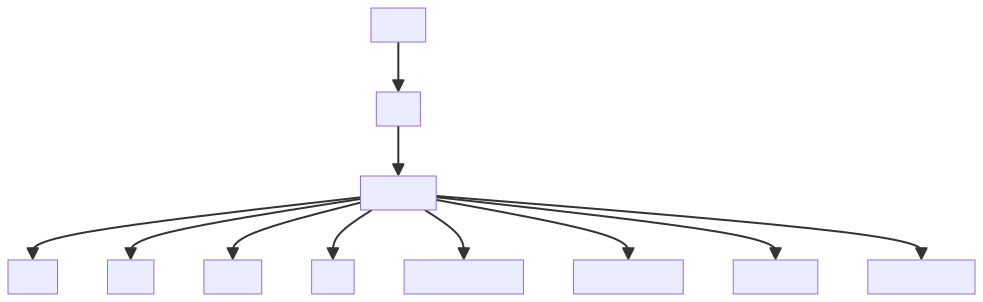

In [16]:
import kroki

kroki.mermaid_image(mermaid_code)

In [13]:
# %%kroki mermaid

# graph TD
#     A[Score] --> B[Part]
#     B --> C[Measure]
#     C --> D[Note]
#     C --> E[Rest]
#     C --> F[Chord]
#     C --> G[Clef]
#     C --> H[TimeSignature]
#     C --> I[KeySignature]
#     C --> J[Dynamics]
#     C --> K[Articulations]

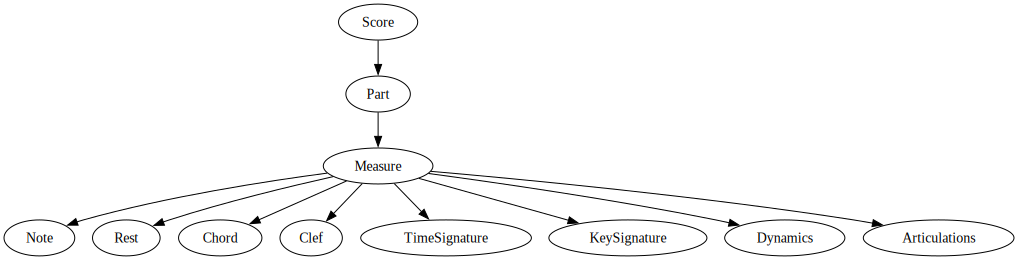

In [8]:
%%kroki graphviz

digraph G {
    A [label="Score"]
    B [label="Part"]
    A -> B
    C [label="Measure"]
    B -> C
    D [label="Note"]
    C -> D
    E [label="Rest"]
    C -> E
    F [label="Chord"]
    C -> F
    G [label="Clef"]
    C -> G
    H [label="TimeSignature"]
    C -> H
    I [label="KeySignature"]
    C -> I
    J [label="Dynamics"]
    C -> J
    K [label="Articulations"]
    C -> K
}

In [1]:
%load_ext kroki


In [18]:
%%kroki graphviz

digraph G {

graph TD
    Score -> B[Part]
    B -> C[Measure]
    C -> D[Note]
    C -> E[Rest]
    C -> F[Chord]
    C -> G[Clef]
    C -> H[TimeSignature]
    C -> I[KeySignature]
    C -> J[Dynamics]
    C -> K[Articulations]
}

RuntimeError: Request returned with an error code 400. Content: 
b"Error 400: Error: <stdin>: syntax error in line 4 near 'A'\n (exit code 1)"

In [10]:
# %%kroki mermaid

# graph TD
#     A[Score] --> B[Part]
#     B --> C[Measure]
#     C --> D[Note]
#     C --> E[Rest]
#     C --> F[Chord]
#     C --> G[Clef]
#     C --> H[TimeSignature]
#     C --> I[KeySignature]
#     C --> J[Dynamics]
#     C --> K[Articulations]

In [5]:
mermaid_code = '''
graph TD
    A[Score] --> B[Part]
    B --> C[Measure]
    C --> D[Note]
    C --> E[Rest]
    C --> F[Chord]
    C --> G[Clef]
    C --> H[TimeSignature]
    C --> I[KeySignature]
    C --> J[Dynamics]
    C --> K[Articulations]
'''

from titbit import mermaid_to_graphviz

print(mermaid_to_graphviz(mermaid_code))

digraph G {
    A [label="Score"]
    B [label="Part"]
    A -> B
    C [label="Measure"]
    B -> C
    D [label="Note"]
    C -> D
    E [label="Rest"]
    C -> E
    F [label="Chord"]
    C -> F
    G [label="Clef"]
    C -> G
    H [label="TimeSignature"]
    C -> H
    I [label="KeySignature"]
    C -> I
    J [label="Dynamics"]
    C -> J
    K [label="Articulations"]
    C -> K
}
